In [1]:
!pip install catboost


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.9 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame


In [4]:
# Data Preprocessing
# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [5]:
# Check data types and convert if necessary
print("Data Types:\n", df.dtypes)


Data Types:
 MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


Summary Statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

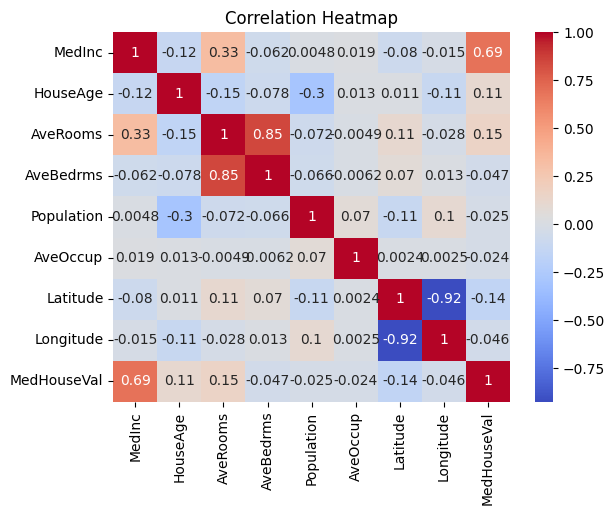

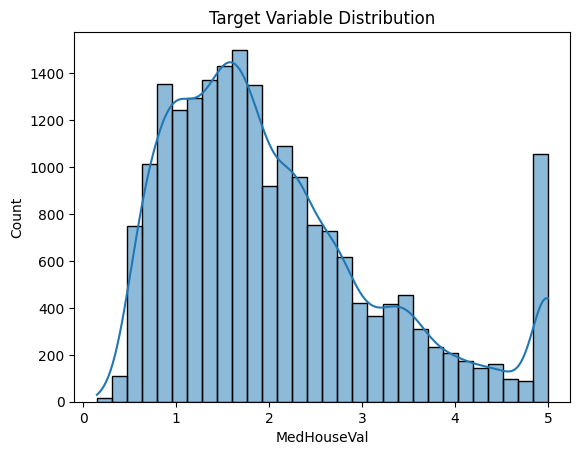

In [6]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print("Summary Statistics:\n", df.describe())

# Pairplot or heatmap for correlation analysis
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Visualize target variable distribution
target_column = 'MedHouseVal'  # Target column in California housing dataset
sns.histplot(df[target_column], kde=True, bins=30)
plt.title("Target Variable Distribution")
plt.show()


In [7]:
# Feature and target selection
X = df.drop(columns=[target_column])
y = df[target_column]


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Define a CatBoost regressor model
model = CatBoostRegressor(verbose=0, random_seed=42)


In [10]:
# Define a grid of hyperparameters to search
grid = {
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7]
}


In [11]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

In [ ]:
# Best parameters and model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.2}


In [ ]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.1914
R-squared: 0.8540


In [ ]:
# Optional: Save the model for future use
best_model.save_model("best_catboost_model.cbm", format="cbm")


In [ ]:
# Make a prediction on new data
sample_data = X_test[:1]  # Replace with your own sample data
prediction = best_model.predict(sample_data)
print("Sample Prediction:", prediction)


Sample Prediction: [0.53154799]
